In [1]:
from pandas import DataFrame, read_csv
import pandas as pd 
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [2]:
file = r'/Users/jingwang/Desktop/default of credit card clients.xls'
df = pd.read_excel(file,header = 1)
df = df.astype(float)
print(df)

            ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE   AGE  PAY_0  PAY_2  \
0          1.0    20000.0  2.0        2.0       1.0  24.0    2.0    2.0   
1          2.0   120000.0  2.0        2.0       2.0  26.0   -1.0    2.0   
2          3.0    90000.0  2.0        2.0       2.0  34.0    0.0    0.0   
3          4.0    50000.0  2.0        2.0       1.0  37.0    0.0    0.0   
4          5.0    50000.0  1.0        2.0       1.0  57.0   -1.0    0.0   
...        ...        ...  ...        ...       ...   ...    ...    ...   
29995  29996.0   220000.0  1.0        3.0       1.0  39.0    0.0    0.0   
29996  29997.0   150000.0  1.0        3.0       2.0  43.0   -1.0   -1.0   
29997  29998.0    30000.0  1.0        2.0       2.0  37.0    4.0    3.0   
29998  29999.0    80000.0  1.0        3.0       1.0  41.0    1.0   -1.0   
29999  30000.0    50000.0  1.0        2.0       1.0  46.0    0.0    0.0   

       PAY_3  PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
0       -1.0   -1.

In [3]:
df.drop(columns = ['ID'],inplace = True)
df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [4]:
pay_cols = ['pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']
pay_cols = [col.upper() for col in pay_cols]


for col in pay_cols:
    fil = (df[col] < 0)
    df.loc[fil, col] = 0

In [5]:
drop_id_1 = (df['EDUCATION'] != 1 ) & (df['EDUCATION'] != 2 ) & (df['EDUCATION'] != 3) & (df['EDUCATION'] != 4 )
drop_id_2 = (df['MARRIAGE'] != 1 ) & (df['MARRIAGE'] != 2 ) & (df['MARRIAGE'] != 3)
keep_id = -(drop_id_1 | drop_id_2)
df = df[keep_id]

In [6]:
df = pd.get_dummies(df)

In [7]:
df = df.astype(float)
df = df.dropna()
scale = MinMaxScaler()
df_to_scale = df
scaled = scale.fit_transform(df_to_scale)
scaled_df = pd.DataFrame(scaled, columns=df_to_scale.columns)

Data Exploration

In [8]:
df['default payment next month'].value_counts()

0.0    22996
1.0     6605
Name: default payment next month, dtype: int64

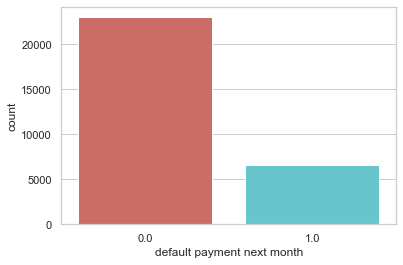

In [9]:
sns.countplot(x='default payment next month',data=df,palette='hls')
plt.show()

In [10]:
count_no_sub = len(df[df['default payment next month']==0])
count_sub = len(df[df['default payment next month']==1])
pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)
print("percentage of no subscription is", pct_of_no_sub*100)
pct_of_sub = count_sub/(count_no_sub+count_sub)
print("percentage of subscription", pct_of_sub*100)

percentage of no subscription is 77.68656464308638
percentage of subscription 22.31343535691362


In [11]:
df.groupby('default payment next month').mean()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
default payment next month,,,,,,,,,,,,,,,,,,,,,
0.0,178299.965211,1.613628,1.796791,1.562924,35.392851,0.195860,0.181162,0.184641,0.150896,0.122847,...,47303.106975,43448.517133,40438.090233,39028.741129,6305.575317,6616.275657,5728.758915,5308.696860,5253.151852,5689.407071
1.0,130125.311128,1.566843,1.880545,1.529447,35.712036,0.923997,0.814686,0.731718,0.644815,0.575170,...,45062.736109,41987.680091,39530.363361,38265.562755,3365.575322,3382.854807,3351.971083,3157.358062,3200.042998,3412.390159


Over-sampling using SMOTE

In [12]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [13]:
X = df.loc[:, df.columns != 'default payment next month']
y = df.loc[:, df.columns == 'default payment next month']
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns
os_data_X,os_data_y=os.fit_resample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['default payment next month'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['default payment next month']==0]))
print("Number of subscription",len(os_data_y[os_data_y['default payment next month']==1]))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['default payment next month']==0])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['default payment next month']==1])/len(os_data_X))

length of oversampled data is  32096
Number of no subscription in oversampled data 16048
Number of subscription 16048
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


Recursive Feature Elimination

In [14]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg, step=20)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

[False False  True False  True  True  True  True  True  True  True False
 False False False False False  True  True False  True False False]
[2 2 1 2 1 1 1 1 1 1 1 2 2 2 2 2 2 1 1 2 1 2 2]


/Users/jingwang/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Implementing the model

In [15]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.448231
         Iterations 7
                              Results: Logit
Model:              Logit                      Pseudo R-squared: 0.156     
Dependent Variable: default payment next month AIC:              26582.1885
Date:               2022-04-18 13:40           BIC:              26772.9865
No. Observations:   29601                      Log-Likelihood:   -13268.   
Df Model:           22                         LL-Null:          -15714.   
Df Residuals:       29578                      LLR p-value:      0.0000    
Converged:          1.0000                     Scale:            1.0000    
No. Iterations:     7.0000                                                 
------------------------------------------------------------------------------
                Coef.     Std.Err.       z        P>|z|      [0.025     0.975]
------------------------------------------------------------------------------
LIMIT_BA

In [16]:
cols=['LIMIT_BAL','SEX','EDUCATION','MARRIAGE','AGE','PAY_0','PAY_3','PAY_4','PAY_5','PAY_6','BILL_AMT1','PAY_AMT1','PAY_AMT2','PAY_AMT6']
X=os_data_X[cols]
y=os_data_y['default payment next month']
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.566003
         Iterations 7
                              Results: Logit
Model:              Logit                      Pseudo R-squared: 0.183     
Dependent Variable: default payment next month AIC:              36360.8484
Date:               2022-04-18 13:40           BIC:              36478.1192
No. Observations:   32096                      Log-Likelihood:   -18166.   
Df Model:           13                         LL-Null:          -22247.   
Df Residuals:       32082                      LLR p-value:      0.0000    
Converged:          1.0000                     Scale:            1.0000    
No. Iterations:     7.0000                                                 
------------------------------------------------------------------------------
                Coef.     Std.Err.       z        P>|z|      [0.025     0.975]
------------------------------------------------------------------------------
LIMIT_BA

Logistic Regression Model Fitting

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [18]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.61


Confusion Matrix

In [19]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[2442 2349]
 [1386 3452]]


Compute precision, recall, F-measure and support

In [20]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.64      0.51      0.57      4791
         1.0       0.60      0.71      0.65      4838

    accuracy                           0.61      9629
   macro avg       0.62      0.61      0.61      9629
weighted avg       0.62      0.61      0.61      9629



ROC Curve

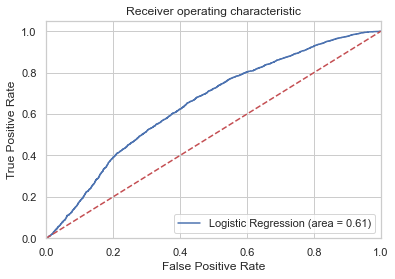

In [21]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()